Problem Statement:
- This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 


-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors


-- Output: Number of predicted wins (W)

In [1]:
#importing essential libraries
import pandas as pd #pandas library
import numpy as np #numpy library

import seaborn as sns #seaborn
import matplotlib.pyplot as plt #matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') #warnings 


In [45]:
#importing the csv file into dataframe

data=pd.read_csv('baseball.csv')
data.head(30)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [3]:
#printing dataset shape
data.shape

(30, 17)

**The dataset contains 30 rows and 17 columns of which W(win) column is label**

**checking for null values in dataset**

In [4]:
data.isna().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

**There are no null values in dataset**

In [5]:
#displaying column names
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
#displaying dataframe info with data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
data.duplicated().sum()

0

**There are no duplicate values in this dataset**

In [12]:
#checking for unique values in W- win column
data['W'].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

<AxesSubplot:xlabel='W', ylabel='Count'>

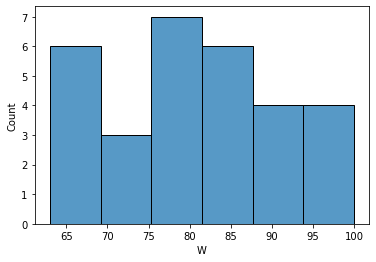

In [15]:
sns.histplot(data['W'])

**Observation:**
- The above plot shows that around 6 times team scored least number of wins that range in approx. 63-69 wins.
- Approximately 8 times team have wins of >87.
- while approx. 4 times the team has wins of >87.

In [18]:
data['R'].unique()

array([724, 696, 669, 622, 689, 891, 764, 713, 644, 748, 751, 729, 661,
       656, 694, 647, 697, 655, 640, 683, 703, 613, 573, 626, 667, 720,
       650, 737], dtype=int64)

<AxesSubplot:xlabel='R', ylabel='Count'>

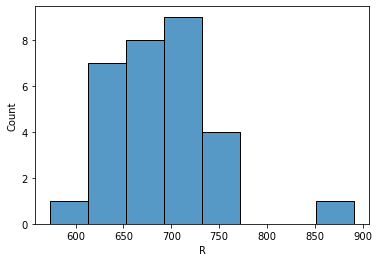

In [30]:
sns.histplot(data['R'])

**Observations**
- The plot shows more than 8 times team scored runs in range of approx.650 to 730.
- 1 time team scored lowest runs i.e. approx.550 to 620 runs while 1 time team scored max. runs of >850.

<AxesSubplot:xlabel='AB', ylabel='Count'>

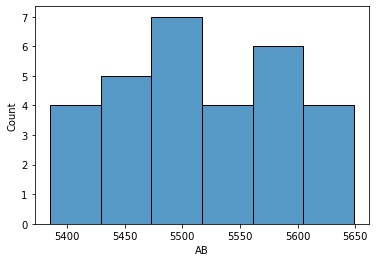

In [32]:
sns.histplot(data['A'])

**Observations**
- The plot shows the approx. 7 times team had approx.5425-5560 at bats in a  season.
- 4 times the  teams had <5425 at bats in a season.

<AxesSubplot:xlabel='H', ylabel='Count'>

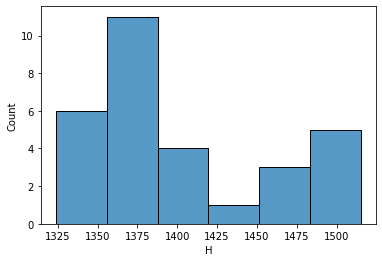

In [36]:
sns.histplot(data['H'])

**Observation:**
- The above plot shows the hits of team in a season.
- More than 10 times a team had hits in range of approx 1360 to 1385.
- Highest number of hits are at approx.>1485

<AxesSubplot:xlabel='2B', ylabel='Count'>

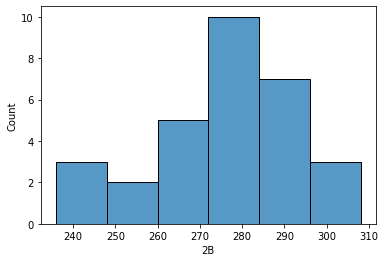

In [38]:
sns.histplot(data['2B'])

Observation:
- More than 8 times this team scored approx. 272-285 second bases in a season.
- while least times only approx.248- 260 second bases were scored. 

<AxesSubplot:xlabel='3B', ylabel='Count'>

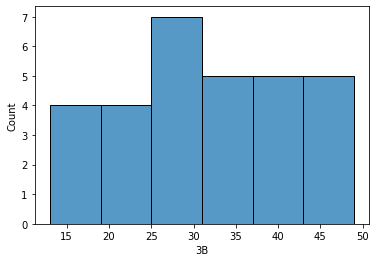

In [42]:
sns.histplot(data['3B'])

Observations:
- The above plot shows that in  7 times a team scored  25-30 3rd bases in a season.
- Around 5 times a team scored >30 third bases in 2014 season. 

<AxesSubplot:xlabel='HR', ylabel='Count'>

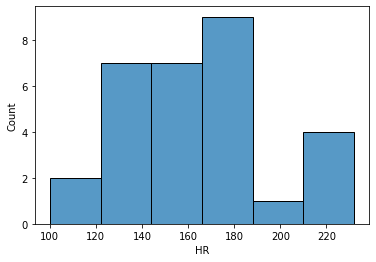

In [47]:
sns.histplot(data['HR'])

Observations:
- This plot shows that >8 times a team scored >160-190 home runs in a season.
- The least number of home runs scored this season are in range of 100-120. while the highest is in range of >220.

<AxesSubplot:xlabel='BB', ylabel='Count'>

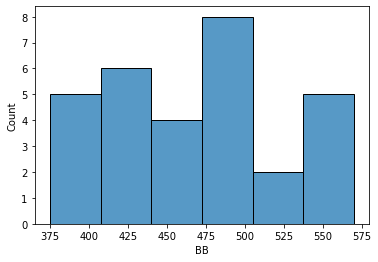

In [48]:
sns.histplot(data['BB'])

Observation:
- The above plot shows that the played had to walk(Base on balls) for 475 to >500 times for 8 games in a season.
- The players received BB for a max amount of >550.

<AxesSubplot:xlabel='SO', ylabel='Count'>

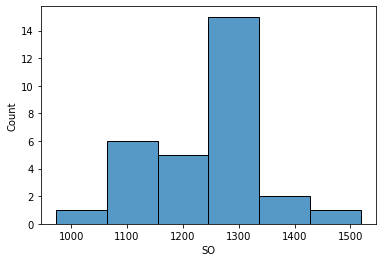

In [49]:
sns.histplot(data['SO'])

Observations:
- In  >14 games, batters were given strikouts of 1250-1330.
- Only once the strikeout score was > 1450

<AxesSubplot:xlabel='SB', ylabel='Count'>

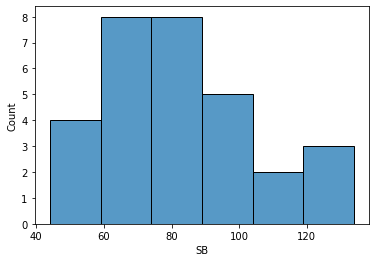

In [50]:
sns.histplot(data['SB'])

Observation:
- The above plot shows that in how many games a player/team has stolen bases.
- In 8 games a player has stolen bases for 60-90 times.
- in 3 games a team has scored max. number of stolen bases.

<AxesSubplot:xlabel='RA', ylabel='Count'>

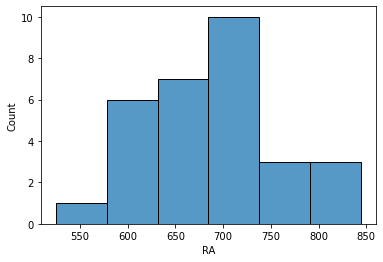

In [55]:
sns.histplot(data['RA'])

Observation:
- From above plot it can be said that The run average was 700-750 for atleast 10 games.


<AxesSubplot:xlabel='ER', ylabel='Count'>

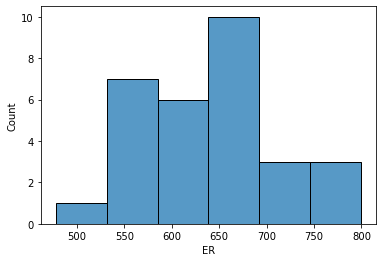

In [56]:
sns.histplot(data['ER'])

Observation:
- The team scored >650-700 earned runs in 10 times.
- 1 time least earned runs were scored in range of 450-525.

<AxesSubplot:xlabel='ERA', ylabel='Count'>

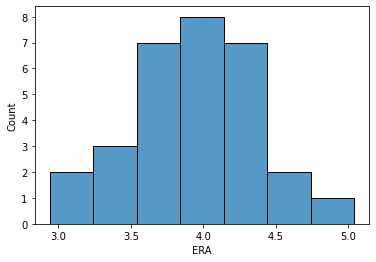

In [60]:
sns.histplot(data['ERA'])

Observation:
- The earned runs average is highest at 4 in 8 games.

<AxesSubplot:xlabel='CG', ylabel='Count'>

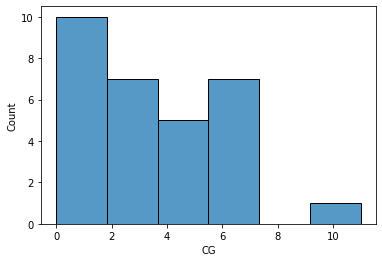

In [63]:
sns.histplot(data['CG'])

Observation:
- The above plot shows that 10 teams scored complete game as they had only one pitcher in their team.
- only 1 team scored 10 complete game.

<AxesSubplot:xlabel='SHO', ylabel='Count'>

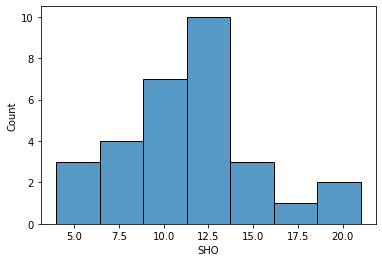

In [62]:
sns.histplot(data['SHO'])

Observations:
- The above plot shows the 10 teams got shutouts. while 2 teams received maximum shutouts.

<AxesSubplot:xlabel='SV', ylabel='Count'>

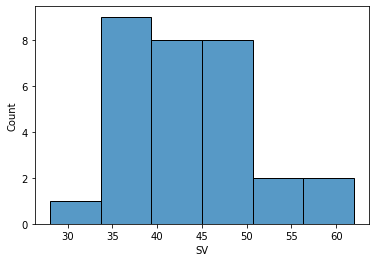

In [64]:
sns.histplot(data['SV'])

Observation:
- maximum teams received 35-40 saves per season while 2 teams received more than 50 saves per season.

<AxesSubplot:xlabel='E', ylabel='Count'>

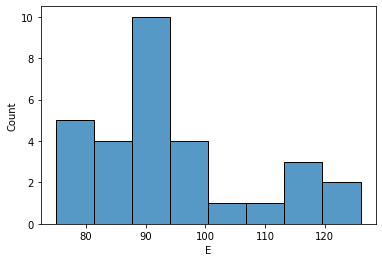

In [65]:
sns.histplot(data['E'])

Observation:
- max number of teams made errors in region of 90-95 times.
- while least number of teams received errors in region of 100-105 times.

<AxesSubplot:xlabel='W', ylabel='R'>

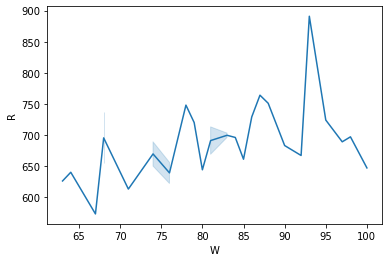

In [71]:
sns.lineplot(x=data['W'],y=data['R'])

Observations:
- The plot shows a positive trend between wins and runs, showing that runs are important in winning games.


<AxesSubplot:xlabel='W', ylabel='AB'>

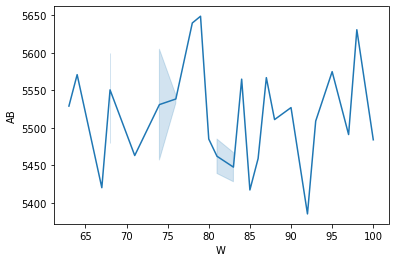

In [85]:
sns.lineplot(x=data['W'],y=data['AB'])

Observation:
-seeing at the plot looks like there is no solid relationship between between wins and at bats for a team in games.    

<AxesSubplot:xlabel='W', ylabel='H'>

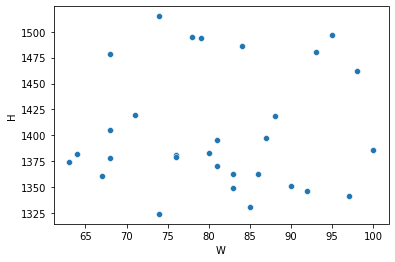

In [91]:
sns.scatterplot(x=data['W'],y=data['H'])

Observation: There is no proper positive relationshio between Hit and Wins as seen in this plot.

<AxesSubplot:xlabel='W', ylabel='2B'>

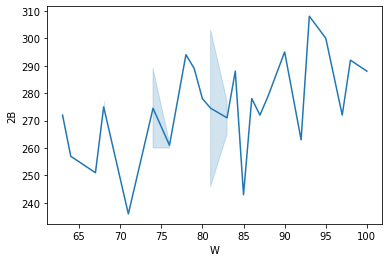

In [99]:
sns.lineplot(x=data['W'],y=data['2B'])

Observation:
- There is a good positive relationship between 2nd base and Wins, this means that if a team scores more 2nd bases then higher chance of winning the game.    

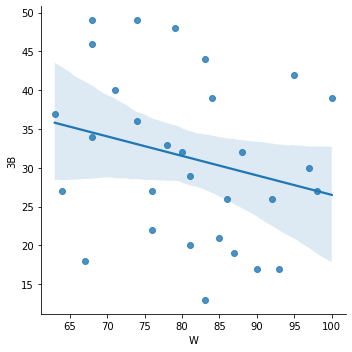

In [97]:
sns.lmplot(x='W',y='3B',data=data)

Observation: As per the regression line shown in plot, it can be seen that more 3rd bases means less wins.

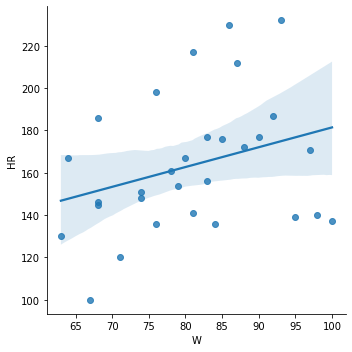

In [101]:
sns.lmplot(x='W',y='HR',data=data)

Observation: The above plot shows that as the home run count increases the chances of winning increases.

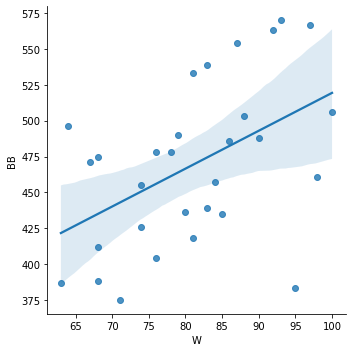

In [104]:
sns.lmplot(x='W',y='BB',data=data)

Observation: The above plot shows that as the more BB or the player walks to 1st base the team has won as per the data.

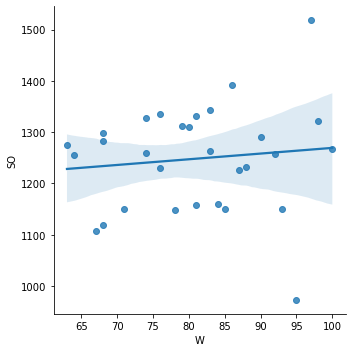

In [109]:
sns.lmplot(x='W',y='SO',data=data)

Observation:
The plot is showing fairly positive trend for strikeouts with respect to wins for a team.

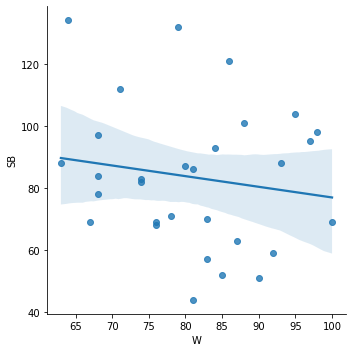

In [112]:
sns.lmplot(x='W',y='SB',data=data)

Observation: 
- The above plot shows that if a team has more than 80 stolen bases than it has the chances of less winnings.
- stolen bases less than 80 for a team, for those teams the winning chances are better.

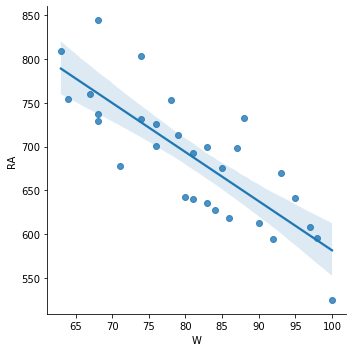

In [113]:
sns.lmplot(x='W',y='RA',data=data)

Observation:
The above plot shows that as the run average increases the winning decreases.

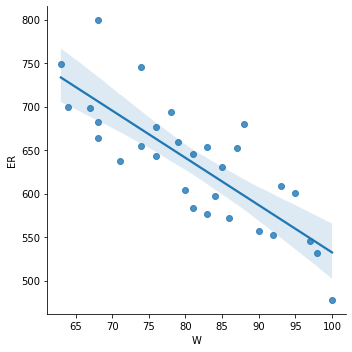

In [114]:
sns.lmplot(x='W',y='ER',data=data)

Observation:
The above plot shows a negative relationship between Earned runs and wins for a team.

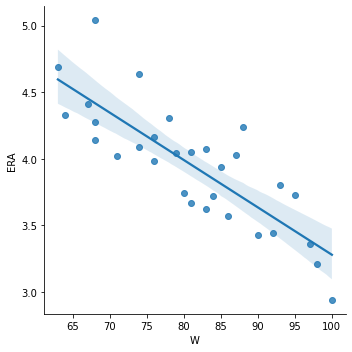

In [115]:
sns.lmplot(x='W',y='ERA',data=data)

Observation: A shown in previous plot it can be seen that Earned run average increases then the chances of winning also decreases. This means that teams that has more wins has less earned runs average per game.

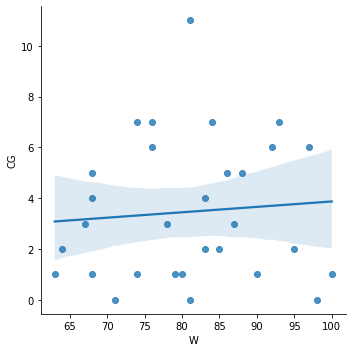

In [118]:
sns.lmplot(x='W',y='CG',data=data)

Observation: As per the regression line it can be seen that more number of complete games, then more winning per game for each team

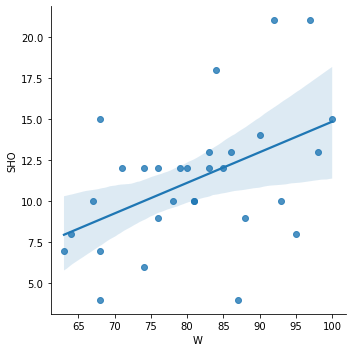

In [119]:
sns.lmplot(x='W',y='SHO',data=data)

Observation: From the plot  and as  regression line it can be seen that more number of shutouts means more chances of winnings.

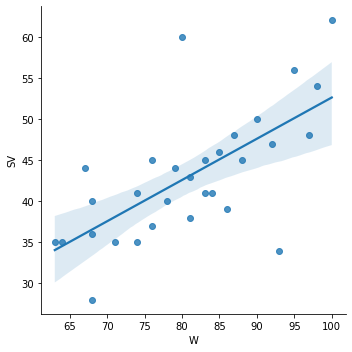

In [121]:
sns.lmplot(x='W',y='SV',data=data)

Observation: More number of saves means more winning points as seen in above plot.

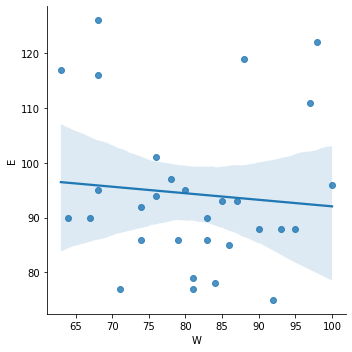

In [122]:
sns.lmplot(x='W',y='E',data=data)

Observation: As per the regression line it can be seen higher number of errors in a game means less chances of winning the game.

In [123]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations:
- In the win(W) column the minimum win for a team is 63 wins while the maximum means for a team is 100. For whole season, the average wins are in range of 81 with a deviation of 10 wins per team.
- The dataset shows presence of outliers as there is vast difference in interquantile ranges in many columns including W.


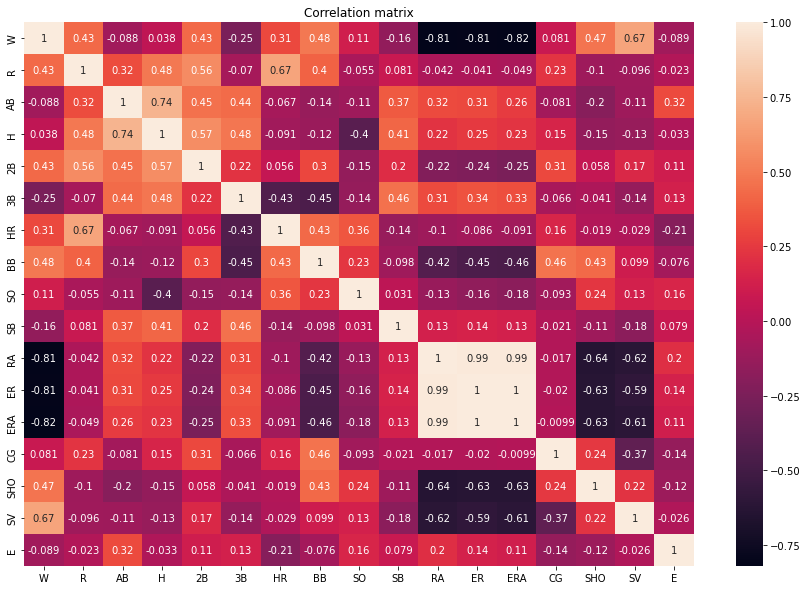

In [125]:
#finding correlation within dataset
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation matrix')
plt.show()

Observations:

I take 75% as the minimum threshold to say that the features/labels has collinearity; this means if a feature has correlation with >=75% then they are correlated and vice versa.
- W is negatively related for >80% to RA(run average), ER(earned run) and ERA(earned run average). This is confirmed previously in plots.
- Multicollinearity is seen where RA(run average) is related to ERA(earned run average) and ER(earned run).

<AxesSubplot:xlabel='RA', ylabel='ERA'>

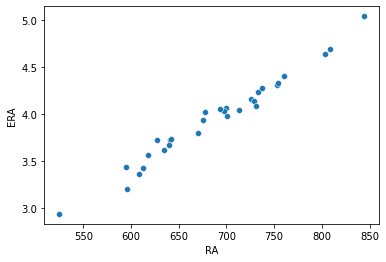

In [126]:
sns.scatterplot(x='RA',y='ERA',data=data)

<AxesSubplot:xlabel='RA', ylabel='RA'>

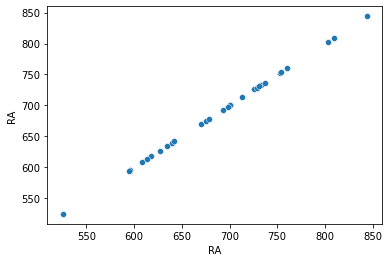

In [127]:
sns.scatterplot(x='RA',y='RA',data=data)

**Observation for both above plots**

Both the above plots show good coorelation in positive manner.

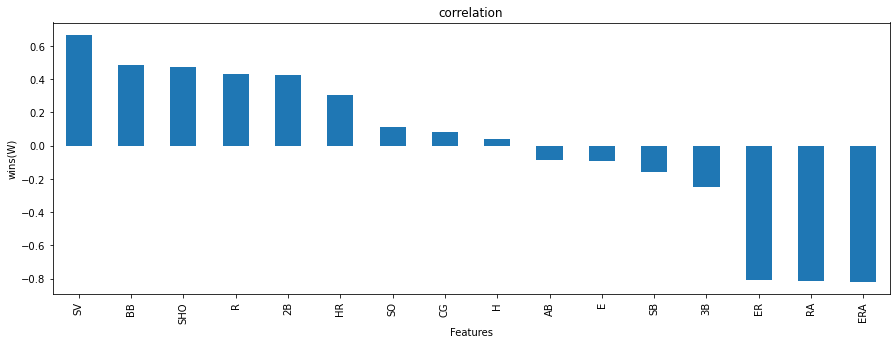

In [128]:
#plotting a coorelation plot that will show relation of features with label(W)

plt.figure(figsize=(15,5))
data.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('wins(W)')
plt.title('correlation')
plt.show()

Observation:
- The above plot shows that SV (Save) is highest positively related to wins while ER(earned run),ERA(earned run average) and RA(run average) is negatively related to Wins. 
- Hit(H) is least related to Wins.

# Using feature selection method to find best features to build a model.

In [129]:
from sklearn.feature_selection import SelectPercentile,chi2

In [130]:
X=data.drop(['W'],axis=1)
Y=data['W']

In [131]:
Spercentile=SelectPercentile(score_func=chi2,percentile=80)
SPercentile=Spercentile.fit(X,Y)

In [132]:
#seperating the features to check for p values
cols= Spercentile.get_support(indices=True)
print('feature index=',cols)


features=X.columns[cols]
print('Features=',list(features))

feature index= [ 0  2  4  5  6  7  8  9 10 12 14 15]
Features= ['R', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG', 'SV', 'E']


**The above list are the ones that are best helpful in building ML model**

In [133]:
data_scores=pd.DataFrame({'features':X.columns,'Chi2score':SPercentile.scores_,'pvalue':SPercentile.pvalues_})
data_scores.sort_values(by='Chi2score',ascending=False)

,features,Chi2score,pvalue
7,SO,213.268413,8.938748e-33
9,RA,197.781566,9.420381e-30
10,ER,192.499607,9.976463e-29
8,SB,166.938124,8.089020e-24
6,BB,161.137711,1.019445e-22
5,HR,142.024649,3.903996e-19
0,R,137.220468,3.022392e-18
4,3B,77.453674,8.163669e-08
15,E,54.037102,2.646094e-04
2,H,50.277253,8.471974e-04


# 4 columns in dataset has highest p value which are SHO,2B,AB and ERA. This columns will be dropped.

In [134]:
#dropping the columns
data=data.drop(['SHO','2B','ERA'],axis=1)
data.head()

,W,R,AB,H,3B,HR,BB,SO,SB,RA,ER,CG,SV,E
0,95,724,5575,1497,42,139,383,973,104,641,601,2,56,88
1,83,696,5467,1349,44,156,439,1264,70,700,653,2,45,86
2,81,669,5439,1395,29,141,533,1157,86,640,584,11,38,79
3,76,622,5533,1381,27,136,404,1231,68,701,643,7,37,101
4,74,689,5605,1515,49,151,455,1259,83,803,746,7,35,86


**dataset now remained with only 14 columns which will be further analysed**

**Checking skewness in dataset**

In [135]:
data.skew()

W     0.047089
R     1.200786
AB    0.183437
H     0.670254
3B    0.129502
HR    0.516441
BB    0.158498
SO   -0.156065
SB    0.479893
RA    0.045734
ER    0.058710
CG    0.736845
SV    0.657524
E     0.890132
dtype: float64

**Looks like many columns are skewed, confirming that with distplots**

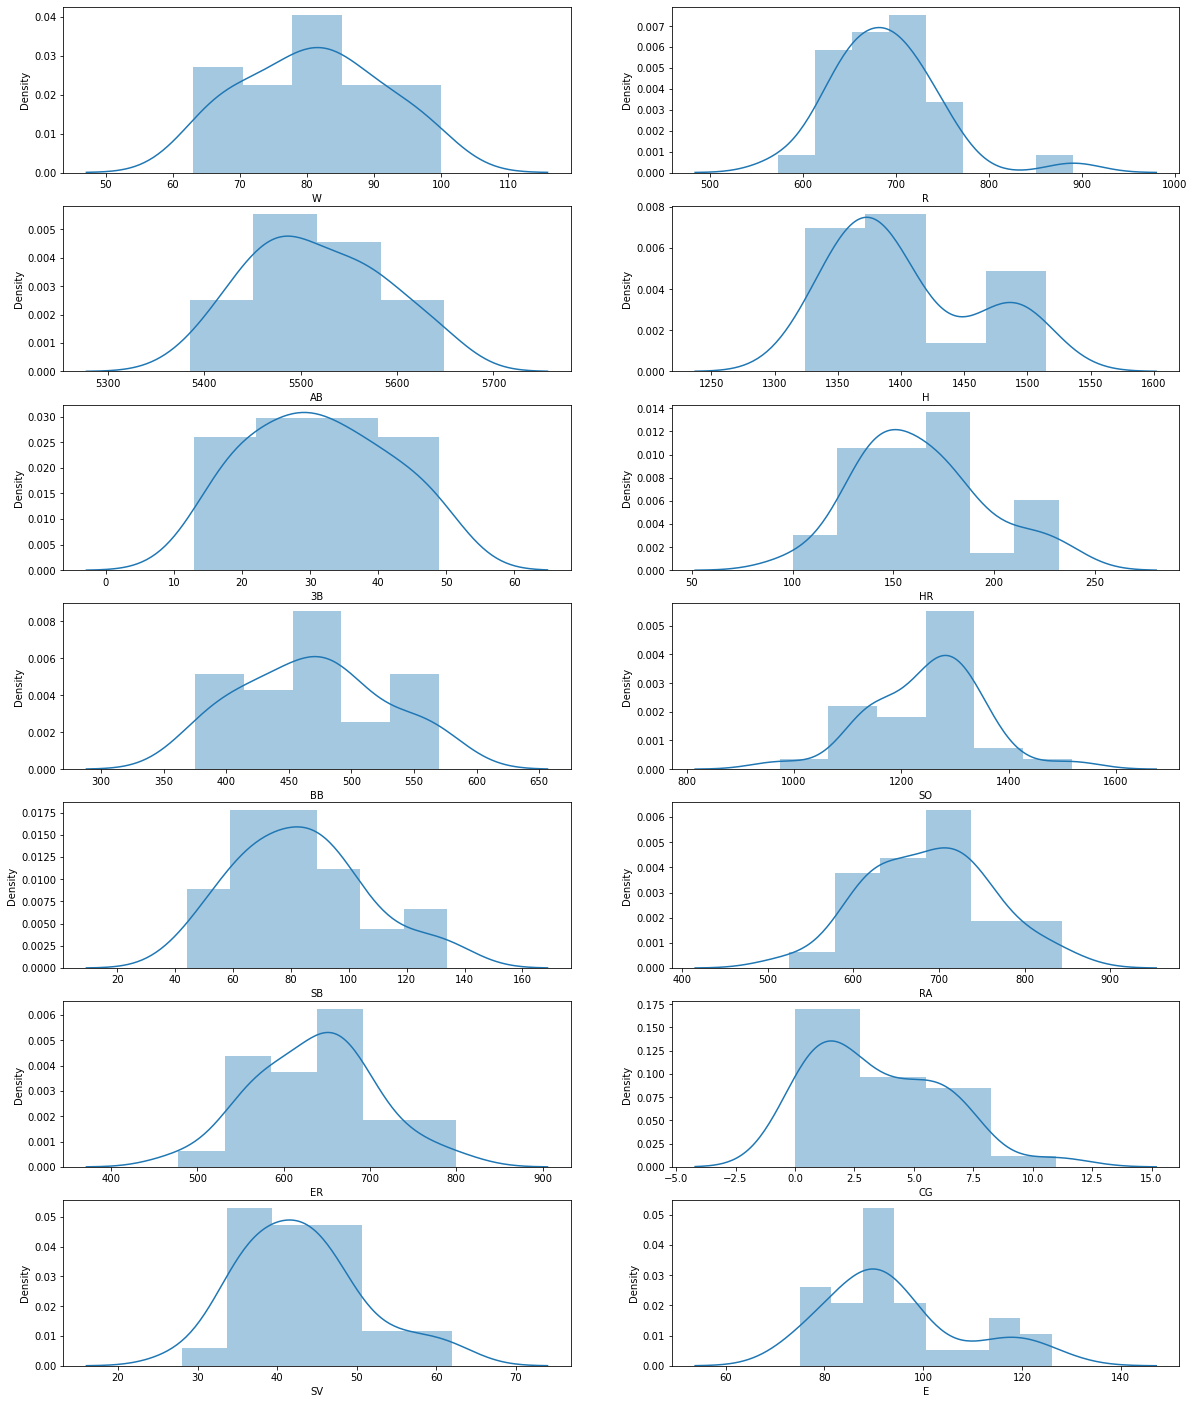

In [138]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(7,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()    
    

**some of the columns show mild skewness, hence removing it using power transformer method**

In [139]:
#importing library
from sklearn.preprocessing import PowerTransformer

scaler=PowerTransformer(method='yeo-johnson') #using yeo-johnson method to transform

In [143]:
#creating features list 
features=[ 'R', 'AB', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG',
       'SV', 'E']

In [145]:
data[features]=scaler.fit_transform(data[features])

In [146]:
data.skew()

W     0.047089
R    -0.055006
AB    0.090410
H     0.000000
3B   -0.072933
HR   -0.000065
BB   -0.007760
SO    0.041170
SB   -0.010455
RA   -0.008082
ER   -0.001940
CG   -0.059785
SV    0.000836
E     0.063909
dtype: float64

In [149]:
data.shape

(30, 14)

# Checking for outliers in dataset

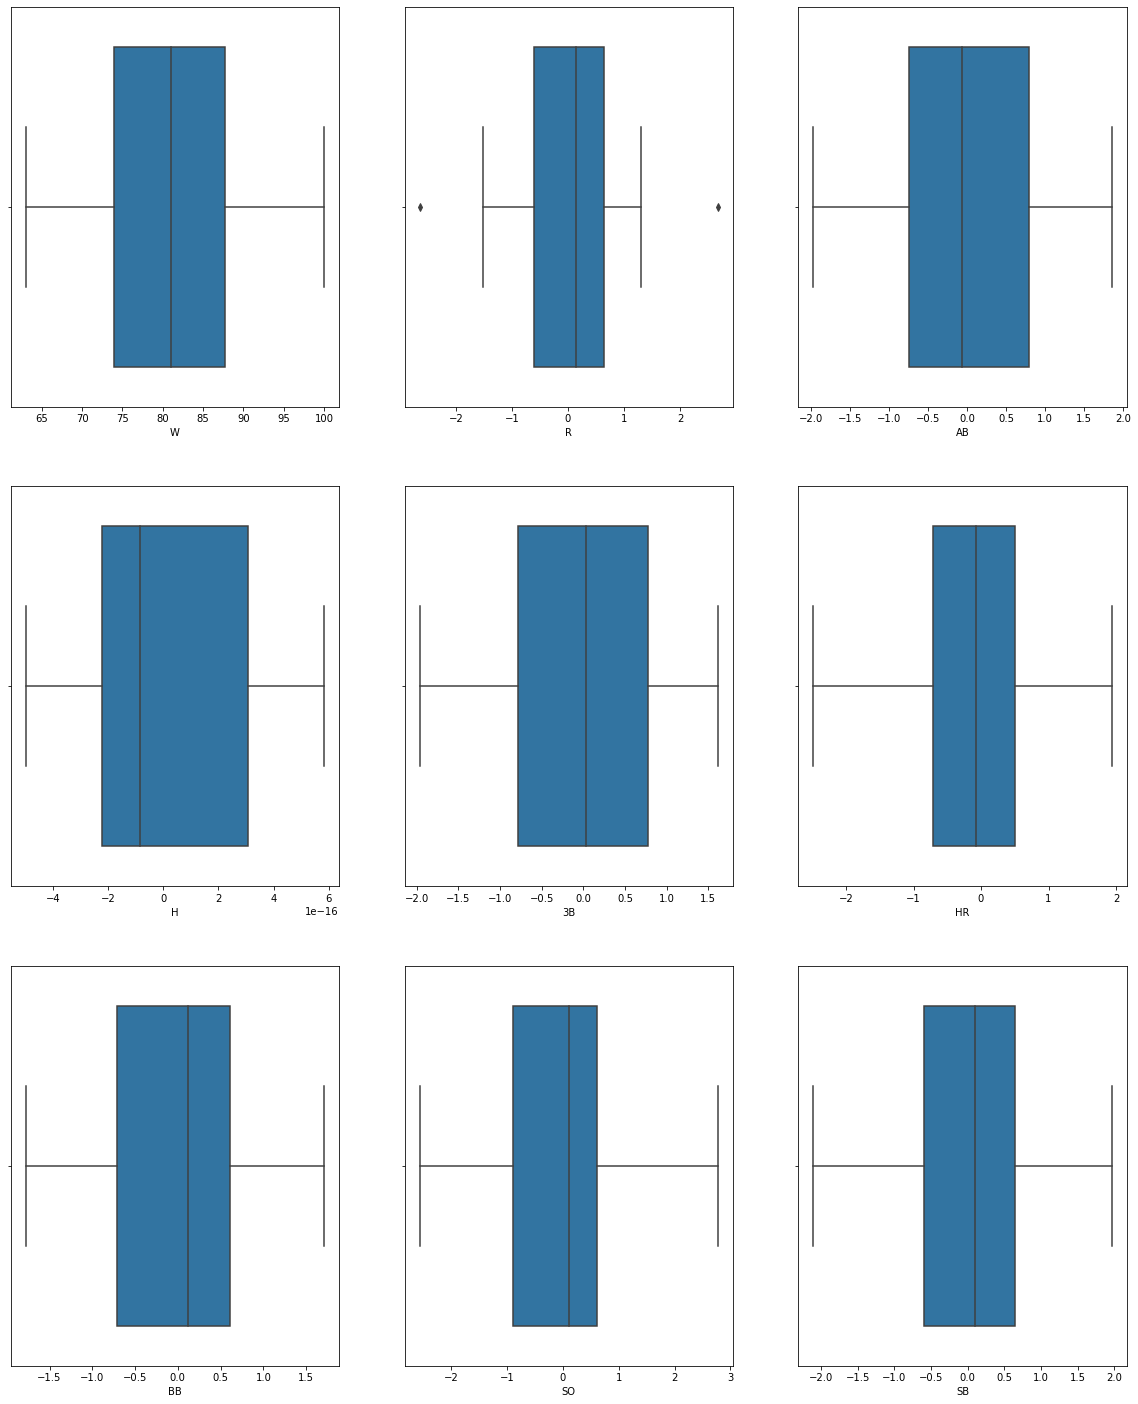

In [151]:
#plotting boxplots for dataset to check for outliers

plt.figure(figsize=(20,25))
plotnumber=1

for column in data:
    if plotnumber<= 9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column)
    plotnumber+=1
plt.show()

# Removal of outliers using z-score method

In [152]:
from scipy.stats import zscore

In [154]:
z_score=zscore(data[[ 'R', 'AB', 'H', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'CG',
       'SV', 'E']])

In [155]:
abs_z_score=np.abs(z_score)

In [156]:
filtering_entry=(abs_z_score<3).all(axis=1)

In [157]:
data=data[filtering_entry]

In [158]:
data.shape

(30, 14)

**There is no data loss after application of z-score method, hence there are no outliers in this dataset**

# Model Building

**Splitting the data into x and y**

In [160]:
x=data.drop(['W'],axis=1)
y=data['W']

**Using power transformer technique scales/normalises that data that is being transformed. Since all the features are already scaled, there is no need to use Standard Scaler.**

**Hence Standard Scaler preprocessing step to normalize/scaling the data will not be performed**

# Initiating train test split

In [161]:
#importing library for regression model
from sklearn.linear_model import LinearRegression

#importing r2 score
from sklearn.metrics import r2_score

#importing train test split
from sklearn.model_selection import train_test_split

from sklearn import metrics

In [162]:
lr=LinearRegression()

In [164]:
#finding best random state for linear regression model
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print('training score is ',(metrics.r2_score(y_train,y_pred)*100),' for random state ',i)
    print('testing score is ',(metrics.r2_score(y_test,pred)*100),' for random state ',i)
    print('\n')

training score is  95.51087399823042  for random state  0
testing score is  43.09965817617497  for random state  0


training score is  95.17546221614799  for random state  1
testing score is  66.15153198770444  for random state  1


training score is  94.009264128993  for random state  2
testing score is  44.65663175630863  for random state  2


training score is  94.90351882082744  for random state  3
testing score is  70.18971257670094  for random state  3


training score is  93.56845003944503  for random state  4
testing score is  71.10549886161479  for random state  4


training score is  93.559249684745  for random state  5
testing score is  86.27450555733326  for random state  5


training score is  92.57324327839905  for random state  6
testing score is  82.31716987994217  for random state  6


training score is  93.73592383372646  for random state  7
testing score is  88.1415746856433  for random state  7


training score is  94.10992555078667  for random state  8
testing sco

In [165]:
#making train and test data split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [166]:
lr.fit(x_train,y_train)

LinearRegression()

In [167]:
# since thge model is already trained, below code will help to predict based on train and test data

y_pred=lr.predict(x_train) 

pred=lr.predict(x_test)

#printing r2 score for testing and training models.
#r2 score give value of how good the model has studied and learnt the data

print(f'training R2 score:{r2_score(y_train,y_pred)*100:.2f}%')
print(f'testing R2 score:{r2_score(y_test,pred)*100:.2f}%')

training R2 score:92.51%
testing R2 score:89.68%


**finding cross validation score**

In [169]:
#importing library for cross validation score
from sklearn.model_selection import cross_val_score

In [171]:
#finding best value for cv in provided range
for i in range(2,20):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv=cv_score.mean()
    print('At cv:-',i)
    print('cross validation score:- ',cv*100)

At cv:- 2
cross validation score:-  -133.99738404995443
At cv:- 3
cross validation score:-  38.496302856515925
At cv:- 4
cross validation score:-  78.53105206414037
At cv:- 5
cross validation score:-  53.52104406499076
At cv:- 6
cross validation score:-  53.444916708954516
At cv:- 7
cross validation score:-  42.538813626919726
At cv:- 8
cross validation score:-  51.72103542761555
At cv:- 9
cross validation score:-  -770.3068959831108
At cv:- 10
cross validation score:-  -703.6022214188179
At cv:- 11
cross validation score:-  -665.999196073537
At cv:- 12
cross validation score:-  -758.7283687096198
At cv:- 13
cross validation score:-  -2878.4628382815695
At cv:- 14
cross validation score:-  -3012.025279565886
At cv:- 15
cross validation score:-  -2822.8856213466297
At cv:- 16
cross validation score:-  nan
At cv:- 17
cross validation score:-  nan
At cv:- 18
cross validation score:-  nan
At cv:- 19
cross validation score:-  nan


In [174]:
#cross validation score
print('Cross Validation Score for Linear Regressor model :- ',((cross_val_score(lr,x,y,cv=4).mean())*100))

Cross Validation Score for Linear Regressor model :-  78.53105206414037


In [175]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [176]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred)))

mean absolute error 2.864164640268106
root mean squared error 3.0583662664088296


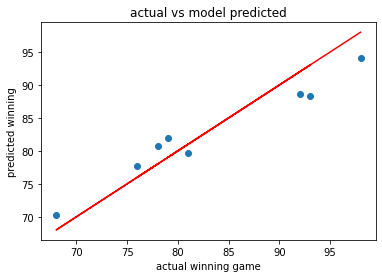

In [193]:
#plotting scatter plot for predicted vs actual

plt.scatter(y_test,pred)
plt.plot(y_test,y_test,color='r')
plt.xlabel('actual winning game')
plt.ylabel('predicted winning')
plt.title('actual vs model predicted')
plt.show()

# Checking if the model is overfitted or not hence applying LASSO and RIDGE regularization methods

In [178]:
#importing necessary library

from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#  LASSO CV

In [179]:
lasscv=LassoCV(alphas=None,max_iter=100,normalize=True) #finding learning rate

#LASSOCV getting trained on training data
lasscv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [180]:
#using learning rate the model learnt and gave alpha value
alpha=lasscv.alpha_
alpha

0.12602288109351747

In [181]:
#using Lasso regression with best alpha value provided

lasso_reg=Lasso(alpha)

#Training model with lasso regression
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.12602288109351747)

In [182]:
#printing Lasso regression score 

print('Lasso CV score for training data',(lasso_reg.score(x_train,y_train))*100)
print('Lasso CV score for testing data',(lasso_reg.score(x_test,y_test))*100)

Lasso CV score for training data 92.12062977944146
Lasso CV score for testing data 87.58489914222595


# RIDGE CV

In [183]:
#setting parameters for ridge CV

ridgeCV=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)

#training on training  dataset with above mentioned parameters that will provide best alpha rate
ridgeCV.fit(x_train,y_train) 

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [184]:
ridgeCV.alpha_ #best alpha value for model

0.09099999999999998

In [185]:
#using alpha value to train ridge model

ridge_model=Ridge(alpha=ridgeCV.alpha_)


#training model on train data set
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.09099999999999998)

In [186]:
#printing ridge CV score
print('RidgeCV score  for training data' ,(ridge_model.score(x_test,y_test))*100) 
print('RidgeCV score for testing data' ,(ridge_model.score(x_test,y_test))*100) 

RidgeCV score  for training data 88.56675680817565
RidgeCV score for testing data 88.56675680817565


# Note:
Since the r2 score for linear regresion, Lasso Cv and Ridge Cv all are approximately same, hence the model is not overfitted.

In [187]:
#importing libraries for Random forests,Decision Tree and Xgboost regressor

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor

In [188]:
#saving models in variables
rf=RandomForestRegressor()
dt=DecisionTreeRegressor()
xgb=xgb.XGBRegressor()

# Random Forests model

In [189]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

#training the model
rf.fit(x_train,y_train)

#predicting model on train and test data
y_pred_rf=rf.predict(x_train)
pred_rf=rf.predict(x_test)


print(f'Training R2 score for random forests regressor model:{r2_score(y_train,y_pred_rf)*100:.2f}%')
print(f'Testing R2 score for random forests regressor model:{r2_score(y_test,pred_rf)*100:.2f}%')

Training R2 score for random forests regressor model:92.01%
Testing R2 score for random forests regressor model:72.38%


In [190]:
#cross validation score
print('Cross Validation Score for Linear Regressor model :- ',((cross_val_score(rf,x,y,cv=4).mean())*100))

Cross Validation Score for Linear Regressor model :-  34.67401070309527


In [198]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_rf))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_rf)))

mean absolute error 3.9687500000000018
root mean squared error 5.002628059330417


# XGB model

In [194]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

#training the model
xgb.fit(x_train,y_train)

#predicting model on train and test data
y_pred_xgb=xgb.predict(x_train)
pred_xgb=xgb.predict(x_test)


print(f'Training R2 score for random forests regressor model:{r2_score(y_train,y_pred_xgb)*100:.2f}%')
print(f'Testing R2 score for random forests regressor model:{r2_score(y_test,pred_xgb)*100:.2f}%')

Training R2 score for random forests regressor model:100.00%
Testing R2 score for random forests regressor model:47.56%


In [196]:
#cross validation score
print('Cross Validation Score for Linear Regressor model :- ',((cross_val_score(xgb,x,y,cv=4).mean())*100))

Cross Validation Score for Linear Regressor model :-  30.016420045166832


In [203]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_xgb))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_xgb)))

mean absolute error 4.7071428298950195
root mean squared error 6.893326358111956


 # Decision Tree Regressor Model

In [200]:
#train_test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

#training the model
dt.fit(x_train,y_train)

#predicting model on train and test data
y_pred_dt=dt.predict(x_train)
pred_dt=dt.predict(x_test)


print(f'Training R2 score for random forests regressor model:{r2_score(y_train,y_pred_dt)*100:.2f}%')
print(f'Testing R2 score for random forests regressor model:{r2_score(y_test,pred_dt)*100:.2f}%')

Training R2 score for random forests regressor model:100.00%
Testing R2 score for random forests regressor model:13.78%


In [201]:
#cross validation score
print('Cross Validation Score for Linear Regressor model :- ',((cross_val_score(dt,x,y,cv=4).mean())*100))

Cross Validation Score for Linear Regressor model :-  -6.956924171748685


In [202]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred_dt))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred_dt)))

mean absolute error 7.125
root mean squared error 8.838834764831844


**Since linear regression has seen most of the data and also give good testing score, its cross validation score is also nearest to testing with very low MAE and RMSE values, hence tuning that model**


In [204]:
# Hyperparameter tuning for Linear regression model

#importing library for grid search cv

from sklearn.model_selection import GridSearchCV

In [205]:
#saving model in new variable

lr1=LinearRegression()

In [206]:
#setting parameters for hyperparameter tuning

params={'fit_intercept':[True,False],
    'normalize':[True,False],
    'copy_X':[True,False],
    'n_jobs':[-1,0,1,2,3,4,5,6],
    'positive':[True,False]}

In [207]:
#instantiating grid_search model with parameters provided  
grid_search=GridSearchCV(estimator=lr1,param_grid=params,cv=5)

#training the model with with combinations of parameters specified
grid_search.fit(x_train,y_train) 

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'n_jobs': [-1, 0, 1, 2, 3, 4, 5, 6],
                         'normalize': [True, False],
                         'positive': [True, False]})

In [208]:
#following command will provide us with best parameters from above list of parameters which helps in increasing accuracy.
best_parameters=grid_search.best_params_

#printing the final best parameters
print(best_parameters)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False, 'positive': False}


In [209]:
#inputting finla parameters in regression model and training it

lr1=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False, positive=False)


#training the model
lr1.fit(x_train,y_train)

LinearRegression(n_jobs=-1, normalize=False)

In [210]:
# training on features
y_pred1=lr1.predict(x_train)

pred1=lr1.predict(x_test)

In [211]:
print(f'Training R2 score for random forests regressor model:{r2_score(y_train,y_pred_dt)*100:.2f}%')
print(f'Testing R2 score for random forests regressor model:{r2_score(y_test,pred_dt)*100:.2f}%')

Training R2 score for random forests regressor model:100.00%
Testing R2 score for random forests regressor model:13.78%


In [212]:
#cross validation score
print('Cross Validation Score for Linear Regressor model :- ',((cross_val_score(lr1,x,y,cv=4).mean())*100))

Cross Validation Score for Linear Regressor model :-  78.53105206414037


In [213]:
#finding mean absolute error() for above model(MAE)
print('mean absolute error',mean_absolute_error(y_test,pred1))

#finding root mean_squared_error(RMSE)
print('root mean squared error',np.sqrt(mean_squared_error(y_test,pred1)))

mean absolute error 2.864164640268106
root mean squared error 3.0583662664088296


# saving the model using pickle

**It can be seen that original Linear regression model performs better compared to hyperparameter tuned one. Hence saving the linear regression model with lr name.**

In [214]:
import pickle

In [215]:
pickle.dump(lr,open('Baseball2014_study_lr','wb'))